In [1]:
# -*- coding: utf-8 -*-
""" QuickStart """
import numpy as np
import geatpy as ea
# 自定义问题类
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self, M):
        name = 'DTLZ1' # 初始化name（函数名称，可以随意设置）
        maxormins = [1] * M # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = M + 4 # 初始化Dim（决策变量维数）
        varTypes = np.array([0] * Dim) # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [0] * Dim # 决策变量下界
        ub = [1] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界
        ubin = [1] * Dim # 决策变量上边界
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    def aimFunc(self, pop): # 目标函数
        Vars = pop.Phen # 得到决策变量矩阵
        XM = Vars[:,(self.M-1):]
        g = 100 * (self.Dim - self.M + 1 + np.sum(((XM - 0.5)**2 - np.cos(20 * np.pi * (XM - 0.5))), 1, keepdims = True))
        ones_metrix = np.ones((Vars.shape[0], 1))
        f = 0.5 * np.fliplr(np.cumprod(np.hstack([ones_metrix, Vars[:,:self.M-1]]), 1)) * np.hstack([ones_metrix, 1 - Vars[:, range(self.M - 2, -1, -1)]]) * np.tile(1 + g, (1, self.M))
        pop.ObjV = f # 把求得的目标函数值赋值给种群pop的ObjV
    def calReferObjV(self): # 计算全局最优解
        uniformPoint, ans = ea.crtup(self.M, 10000) # 生成10000个在各目标的单位维度上均匀分布的参考点
        globalBestObjV = uniformPoint / 2
        return globalBestObjV


2.84217E-04 | 2.08953E-02 | 8.38634E-01 | 2.06027E-03 
212| 19383  | 2.84574E-04 | 2.08946E-02 | 8.38639E-01 | 2.05126E-03 
213| 19474  | 2.83494E-04 | 2.08927E-02 | 8.38645E-01 | 2.04338E-03 
214| 19565  | 2.84979E-04 | 2.08944E-02 | 8.38636E-01 | 2.04553E-03 
215| 19656  | 2.86401E-04 | 2.08932E-02 | 8.38631E-01 | 2.02891E-03 
216| 19747  | 2.82373E-04 | 2.08841E-02 | 8.38695E-01 | 1.93872E-03 
217| 19838  | 2.83455E-04 | 2.08875E-02 | 8.38676E-01 | 1.92999E-03 
218| 19929  | 2.82849E-04 | 2.08858E-02 | 8.38686E-01 | 1.93668E-03 
219| 20020  | 2.79368E-04 | 2.08735E-02 | 8.38728E-01 | 1.58197E-03 
220| 20111  | 2.78480E-04 | 2.08715E-02 | 8.38733E-01 | 1.47473E-03 
221| 20202  | 2.76791E-04 | 2.08689E-02 | 8.38750E-01 | 1.48142E-03 
222| 20293  | 2.75044E-04 | 2.08611E-02 | 8.38787E-01 | 1.41494E-03 
223| 20384  | 2.69761E-04 | 2.08460E-02 | 8.38880E-01 | 1.38820E-03 
224| 20475  | 2.67817E-04 | 2.08435E-02 | 8.38901E-01 | 1.35093E-03 
225| 20566  | 2.67715E-04 | 2.08410E-02 | 8.3892

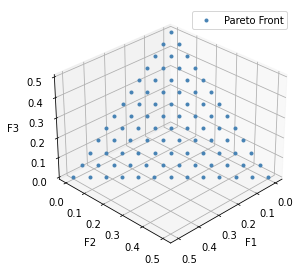

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
种群信息导出完毕。
用时：0.887814 秒
评价次数：45500 次
非支配个体数：91 个
GD 0.00020204500966614154
IGD 0.020630185137436828
HV 0.8408037424087524
Spacing 0.0002236529422432393


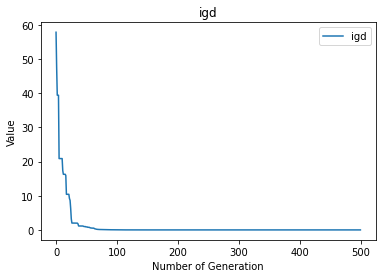

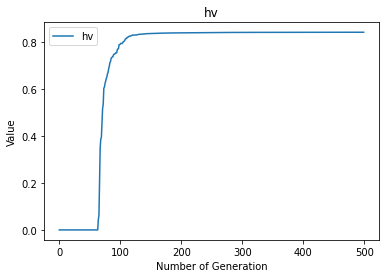

In [2]:
# 编写执行代码
"""===============================实例化问题对象=============================="""
M = 3                     # 设置目标维数
problem = MyProblem(M)    # 生成问题对象
"""==================================种群设置================================="""
Encoding = 'RI'           # 编码方式
NIND = 100                # 种群规模
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
"""================================算法参数设置==============================="""
myAlgorithm = ea.moea_NSGA3_templet(problem, population) # 实例化一个算法模板对象
myAlgorithm.MAXGEN = 500  # 最大进化代数
myAlgorithm.logTras = 1 # 设置每多少代记录日志，若设置成0则表示不记录日志
myAlgorithm.verbose = True # 设置是否打印输出日志信息
myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
"""==========================调用算法模板进行种群进化=========================
调用run执行算法模板，得到帕累托最优解集NDSet以及最后一代种群。NDSet是一个种群类Population的对象。
NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
详见Population.py中关于种群类的定义。
"""
[NDSet, population] = myAlgorithm.run() # 执行算法模板，得到非支配种群以及最后一代种群
NDSet.save()  # 把非支配种群的信息保存到文件中
"""==================================输出结果=============================="""
print('用时：%f 秒' % myAlgorithm.passTime)
print('评价次数：%d 次' % myAlgorithm.evalsNum)
print('非支配个体数：%d 个' % NDSet.sizes) if NDSet.sizes != 0 else print('没有找到可行解！')
if myAlgorithm.log is not None and NDSet.sizes != 0:
    print('GD', myAlgorithm.log['gd'][-1])
    print('IGD', myAlgorithm.log['igd'][-1])
    print('HV', myAlgorithm.log['hv'][-1])
    print('Spacing', myAlgorithm.log['spacing'][-1])
    """=========================进化过程指标追踪分析========================="""
    metricName = [['igd'], ['hv']]
    Metrics = np.array([myAlgorithm.log[metricName[i][0]] for i in range(len(metricName))]).T
    # 绘制指标追踪分析图
    ea.trcplot(Metrics, labels=metricName, titles=metricName)